In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import matplotlib.ticker as ticker
from collections import Counter
import scipy.stats as stats
from scipy.stats import binom


In [15]:
timings_path = "../../../../data/readsimulator/timings.tsv"


In [16]:
timings = pd.read_csv(timings_path, sep="\t", header=None)

In [17]:
# I have a dataframe where the first column is the type of timing, the second is the time. I ran something 10 times so each timing type is in there 10 tyimes. Combine it so that I have a dictionary of timeing type and then a list of the 10 times, Don't make it dependent on the number of times I ran it. Just go through the dataframe and add the times to the list of the timing type

timing_dict = {}
for index, row in timings.iterrows():
    if row[0] in timing_dict:
        timing_dict[row[0]].append(row[1])
    else:
        timing_dict[row[0]] = [row[1]]


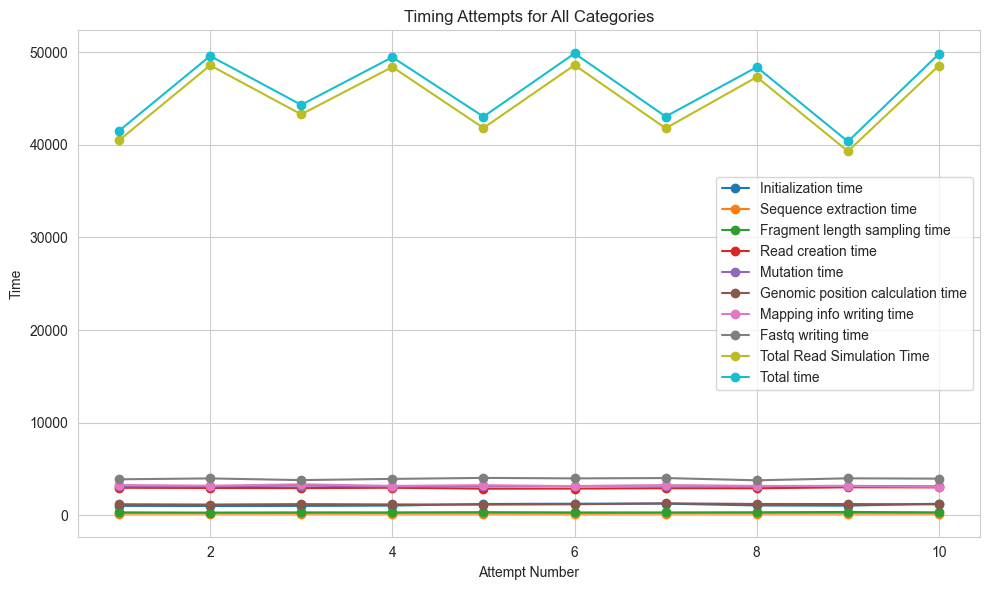

In [18]:
# Create a line plot for all the attempts across all categories
fig, ax = plt.subplots(figsize=(10, 6))

for category, times in timing_dict.items():
    ax.plot(range(1, len(times) + 1), times, marker='o', label=category)

# Add labels, title, and legend
ax.set_title('Timing Attempts for All Categories')
ax.set_xlabel('Attempt Number')
ax.set_ylabel('Time')
ax.grid(True)
ax.legend()
plt.tight_layout()

# Show the plot
plt.show()

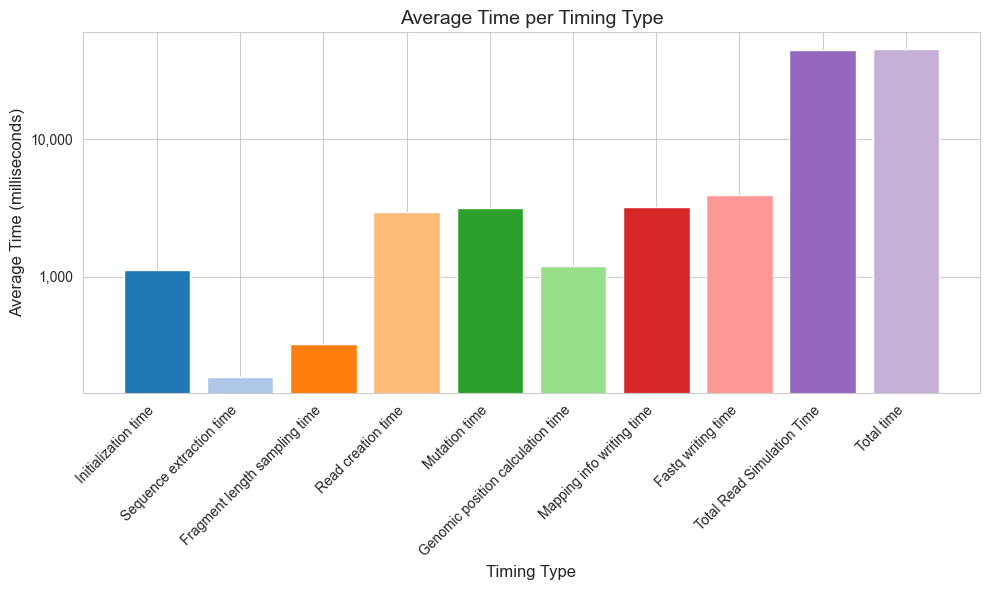

In [27]:
# Calculate the average for each category
average_times = {key: sum(values) / len(values) for key, values in timing_dict.items()}

# Create a DataFrame for easier plotting
average_df = pd.DataFrame(list(average_times.items()), columns=['Timing Type', 'Average Time'])

colors = plt.colormaps['tab20'](range(len(average_df)))

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(average_df['Timing Type'], average_df['Average Time'], color=colors)
plt.xlabel('Timing Type', fontsize=12)
plt.yscale('log')  # Use logarithmic scale
plt.ylabel('Average Time (milliseconds)', fontsize=12)
plt.title('Average Time per Timing Type', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Since we are using a log scale, we cannot use ticklabel_format. Instead, set y-ticks explicitly if needed
plt.gca().get_yaxis().set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))  # Format y-axis
plt.tight_layout()
plt.show()